# Regression model evaluation

## RMSE and R^2 are your new best friends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from regprepare import get_auto_mpg, train_val_test
import warnings
warnings.filterwarnings("ignore")
import evaluate as e

In [2]:
df = get_auto_mpg()
df = df.reset_index()
df.head()

,index,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
train, val, test = train_val_test(df, stratify = 'mpg')
train.shape, val.shape, test.shape

((235, 10), (78, 10), (79, 10))

## Establish baseline and model predicitions

The baseline is the mean of the actual values


A basic LinearRegression model will be used to make predictions

In [4]:
train['mpg'].mean()

23.503829787234046

In [5]:
preds = train[['horsepower', 'mpg']]

In [6]:
preds['baseline'] = round(train['mpg'].mean(), 2)
preds.head()

,horsepower,mpg,baseline
210,180.0,16.5,23.5
342,67.0,32.3,23.5
323,48.0,44.3,23.5
89,198.0,12.0,23.5
244,52.0,32.8,23.5


In [7]:
ols_model = LinearRegression()

ols_model.fit(train[['horsepower']], train[['mpg']])

LinearRegression()

In [8]:
preds['y_hat'] = ols_model.predict(train[['horsepower']])

In [9]:
preds.head()

,horsepower,mpg,baseline,y_hat
210,180.0,16.5,23.5,11.058302
342,67.0,32.3,23.5,30.114463
323,48.0,44.3,23.5,33.318596
89,198.0,12.0,23.5,8.022807
244,52.0,32.8,23.5,32.644042


## Compute residuals

predicitions - actual

In [10]:
preds['baseline_residuals'] = preds.baseline - preds.mpg
preds['residuals'] = preds.y_hat - preds.mpg

In [11]:
preds.head()

,horsepower,mpg,baseline,y_hat,baseline_residuals,residuals
210,180.0,16.5,23.5,11.058302,7.0,-5.441698
342,67.0,32.3,23.5,30.114463,-8.8,-2.185537
323,48.0,44.3,23.5,33.318596,-20.8,-10.981404
89,198.0,12.0,23.5,8.022807,11.5,-3.977193
244,52.0,32.8,23.5,32.644042,-9.3,-0.155958


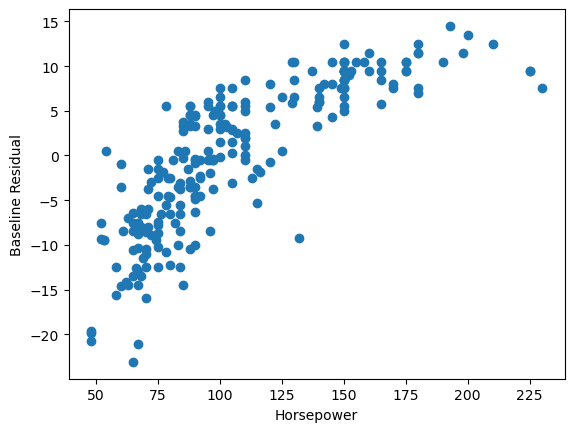

In [12]:
plt.scatter(preds.horsepower, preds.baseline_residuals)
plt.xlabel('Horsepower')
plt.ylabel('Baseline Residual')
plt.show()

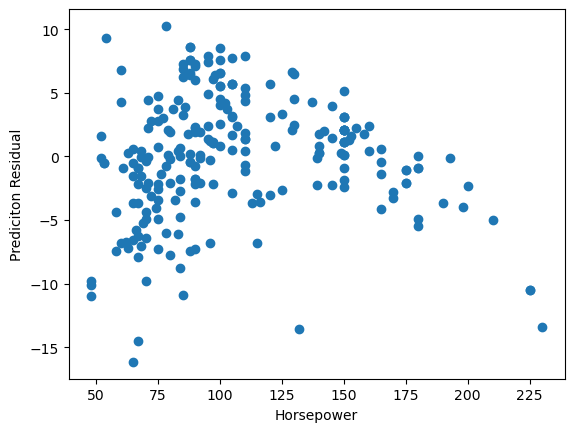

In [13]:
plt.scatter(preds.horsepower, preds.residuals)
plt.xlabel('Horsepower')
plt.ylabel('Prediciton Residual')
plt.show()

## Compute SSE

SSE - Sume of Squared Errors


Also known as RSS - Residual Sum Squared


Predicted - actual, squared and summed

In [14]:
preds['baseline_res_squared'] = preds['baseline_residuals'] ** 2
preds['residuals_squared'] = preds['residuals'] ** 2
preds

,horsepower,mpg,baseline,y_hat,baseline_residuals,residuals,baseline_res_squared,residuals_squared
210,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
342,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574
323,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236
89,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065
244,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323
...,...,...,...,...,...,...,...,...
71,150.0,15.0,23.5,16.117459,8.5,1.117459,72.25,1.248716
106,100.0,18.0,23.5,24.549389,5.5,6.549389,30.25,42.894497
270,85.0,23.8,23.5,27.078968,-0.3,3.278968,0.09,10.751631
348,65.0,29.9,23.5,30.451740,-6.4,0.551740,40.96,0.304417


In [15]:
b_SSE = preds.baseline_res_squared.sum()
p_SSE = sum(preds.residuals_squared)

In [16]:
b_SSE

15330.830000000002

## Compute MSE

MSE - Mean Squared Error

Divide the SSE by total number of data points

In [17]:
b_MSE = b_SSE/len(preds)
p_MSE = p_SSE/len(preds)

In [18]:
b_MSE, p_MSE

(65.23757446808511, 22.78923096941157)

## Compute RMSE

RMSE - Root Mean Squared Error

Take the Square Root of the MSE

In [19]:
b_RMSE = sqrt(b_MSE)
p_RMSE = sqrt(p_MSE)

In [20]:
b_RMSE, p_RMSE

(8.076978052965423, 4.773806758700186)

## Doing it with the sklearn library

mean_squared_error

In [21]:
ba_RMSE = mean_squared_error(preds.mpg, preds.baseline, squared = False)
pr_RMSE = mean_squared_error(preds.mpg, preds.y_hat, squared = False)
ba_RMSE, pr_RMSE

(8.076978052965423, 4.773806758700185)

## Model Significance

Calculating the R^2 value by hand

R^2 = ESS/TSS

## Compute ESS

ESS - Explained Sum of Squares

Prediciton - mean of actual values squared and summed

In [22]:
ESS = ((preds.y_hat - preds.baseline) ** 2).sum()
ESS

9975.360722188278

## Compute TSS

TSS - Total Sum of Squares

ESS + SSE

In [23]:
TSS = ESS + p_SSE
TSS

15330.829999999996

## Putting it all together

In [24]:
ESS / TSS

0.6506732330988133

## Using the sklearn library instead

explained_variance_score

In [25]:
EVS = explained_variance_score(preds.mpg, preds.y_hat)
EVS

0.6506731545601601

In [26]:
r2_score(preds.mpg, preds.y_hat)

0.6506731545601601

In [27]:
e.regression_errors(preds.mpg, preds.y_hat)

5355.469277811719 is the SSE 
 9975.35727537977 is the ESS 
 15330.82655319149 is the TSS 
 22.78923096941157 is the MSE 
 4.773806758700186 is the RMSE


In [28]:
e.better_than_baseline(preds.mpg, preds.y_hat)

The model is better than the baseline
